In [113]:
import math as math

import numpy as np

In [114]:
data = np.genfromtxt('data_class10.csv', delimiter=',')

print(data.shape)
n = data.shape[0]

(1200, 2)


In [115]:
k = 6

In [116]:
# Option 1
# Takes 6 random index from the dataset
# center_idx = np.random.choice(n, k, replace=False)
# 
# centers = list()

# for i in center_idx:
#     centers.append(data[i].tolist())

In [117]:
# Option 2
centers = data[np.random.choice(n, k, replace=False)]

In [118]:
print(centers)

[[ 6.73244556e+00  1.12903664e+00]
 [ 5.47792675e-01  7.99953799e+00]
 [ 7.34576181e-01  8.42896859e-01]
 [ 7.04577816e+00 -3.02903294e-04]
 [ 7.35721508e-01 -1.94868583e+00]
 [ 1.25064038e+01  5.22351941e+00]]


In [119]:
def calc_distance(a, b):
    distance = 0
    for x1, x2 in zip(a, b):
        distance += (x1 - x2) ** 2
    return math.sqrt(distance)

In [120]:
for s in data:
    idx = -1
    min = 999
    for i, c in enumerate(centers):
        distance = calc_distance(s, c)
        if min > distance:
            min = distance
            idx = i

In [121]:
data[0]

array([0.20987452, 2.00290685])

In [122]:
centers[0]

array([6.73244556, 1.12903664])

In [123]:
data[0] - centers[0]

array([-6.52257105,  0.87387021])

In [124]:
math.sqrt(((data[0] - centers[0]) ** 2).sum())

6.580849655370652

In [125]:
math.sqrt(((data[0] - centers[1]) ** 2).sum())

6.00614466833116

In [126]:
(data-centers[0]).shape

(1200, 2)

In [127]:
(data-centers[0]) ** 2

array([[42.54393304,  0.76364914],
       [23.10898862,  0.42676763],
       [34.18839871,  0.97542572],
       ...,
       [50.2747591 , 13.17554858],
       [41.85656055,  9.57505051],
       [33.88632103, 13.31383308]])

In [128]:
((data-centers[0]) ** 2).sum(axis=1) ** 0.5

array([6.58084966, 4.85136643, 5.92990931, ..., 7.96557014, 7.17158358,
       6.87023683])

In [129]:
distance = np.zeros((n, k))

for i in range(k):
    # Center to distance
    distance[:,i] = ((data-centers[i]) ** 2).sum(axis=1) ** 0.5

In [130]:
distance

array([[ 6.58084966,  6.00614467,  1.27315946,  7.12337195,  3.98642694,
        12.71129333],
       [ 4.85136643,  6.36799326,  1.51665363,  5.42193433,  3.91603773,
        11.12665362],
       [ 5.92990931,  7.86538504,  0.71751905,  6.16204676,  2.09543589,
        12.68371292],
       ...,
       [ 7.96557014, 13.66495271, 13.66159983,  8.28125153, 14.70597433,
         1.39610864],
       [ 7.17158358, 13.20571891, 12.91770757,  7.46592552, 13.91062265,
         1.21830096],
       [ 6.87023683, 12.43059461, 12.45689177,  7.2915907 , 13.59814341,
         0.44816663]])

In [131]:
np.argmin(distance, axis = 1).shape

(1200,)

In [132]:
closest = np.argmin(distance, axis = 1)

In [133]:
closest

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [134]:
closest==0

array([False, False, False, ..., False, False, False])

In [135]:
for i in range(k):
    centers[i] = data[closest==i].mean(axis=0)

In [136]:
centers

array([[ 6.36270664,  3.37242933],
       [ 1.75737418,  7.51820679],
       [ 1.10244064,  1.30166732],
       [ 8.00489232,  0.04805785],
       [ 0.90969771, -1.04361132],
       [12.95380065,  9.05971102]])

In [137]:
old_closest = closest.copy()

In [138]:
# if all(old_closest == closest):
#     break

In [139]:
from matplotlib import pyplot as plt

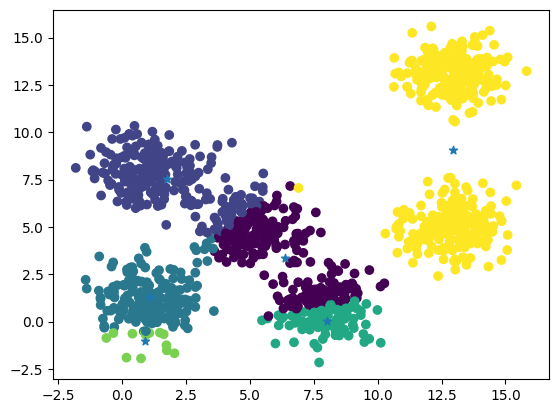

In [140]:
plt.scatter(data[:,0],data[:,1],c=closest)
plt.scatter(centers[:,0],centers[:,1],marker='*')
plt.show()